In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data with the correct separator
data = pd.read_csv('twitter_validation2.csv', encoding='latin-1', sep=',')

# Display the first few rows of the dataset
print(data.head())


   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [15]:
print(data.shape)

(31962, 4)


In [18]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


In [36]:
import re

def remove_twitter_handles(tweet):
    # Remove Twitter handles (e.g., @user)
    return re.sub(r'@[\w]+', '', tweet)

def remove_special_characters(tweet):
    # Remove special characters, numbers, and punctuation
    return re.sub(r'[^a-zA-Z\s]', '', tweet)

def preprocess_tweet(tweet):
    # Apply the preprocessing function to the 'tweet' column
    cleaned_tweet = remove_twitter_handles(tweet)
    cleaned_tweet = remove_special_characters(cleaned_tweet)

    # Remove short words (length less than 3)
    cleaned_tweet = ' '.join(word for word in cleaned_tweet.split() if len(word) > 2)

    return cleaned_tweet



# Apply each step of the preprocessing function using NumPy
remove_handles_func = np.vectorize(remove_twitter_handles)
remove_chars_func = np.vectorize(remove_special_characters)

data['tweet_no_handles'] = remove_handles_func(data['tweet'])
print("\nRemove Twitter handles:")
print(data['tweet_no_handles'].iloc[0])
print(data.head())



Remove Twitter handles:
  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
   id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                       cleaned_tweet  \
0  when father dysfunctional and selfish drags hi...   
1  thanks for lyft credit cant use cause they don...   
2                                bihday your majesty   
3                  model love take with all the time   
4                  factsguide society now motivation   

                                    tweet_no_handles  \
0    when a father is dysfunctional and is so sel...   
1    thanks for #lyft cre

In [34]:

data['cleaned_tweet'] = data['tweet'].apply(preprocess_tweet)

# Display the results
print("Original Tweet:")
print(data['tweet'].iloc[0])
print(data.head())



print("\nCleaned Tweet:")
print(data['cleaned_tweet'].iloc[0])


In [37]:
data['tweet_no_special_chars'] = remove_chars_func(data['tweet'])

print("\nRemove special characters:")
print(data['tweet_no_special_chars'].iloc(0))
print(data.head())


Remove special characters:
   id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                       cleaned_tweet  \
0  when father dysfunctional and selfish drags hi...   
1  thanks for lyft credit cant use cause they don...   
2                                bihday your majesty   
3                  model love take with all the time   
4                  factsguide society now motivation   

                                    tweet_no_handles  \
0    when a father is dysfunctional and is so sel...   
1    thanks for #lyft credit i can't use cause th...   
2                                bihday your majesty   
3  #mode

In [39]:
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

# Tokenize the string into individual words
def tokenize_string(tweet):
    return word_tokenize(tweet)

# Apply tokenization to the 'cleaned_tweet' column
data['tokens'] = data['cleaned_tweet'].apply(tokenize_string)

# Display the original and tokenized tweets
print("Original Tweet:")
print(data['cleaned_tweet'].iloc[0])

print("\nTokenized Tweet:")
print(data['tokens'].iloc[0])
print(data.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original Tweet:
when father dysfunctional and selfish drags his kids into his dysfunction run

Tokenized Tweet:
['when', 'father', 'dysfunctional', 'and', 'selfish', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', 'run']
   id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                       cleaned_tweet  \
0  when father dysfunctional and selfish drags hi...   
1  thanks for lyft credit cant use cause they don...   
2                                bihday your majesty   
3                  model love take with all the time   
4                  factsguide society now motivation   

                                 

In [41]:
import nltk
from nltk.stem import PorterStemmer

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Function to apply stemming to a list of tokens
def apply_stemming(tokens):
    return [porter_stemmer.stem(token) for token in tokens]

# Apply stemming to the 'tokens' column
data['stemmed_tokens'] = data['tokens'].apply(apply_stemming)

# Display the original and stemmed tokens
print("Original Tokens:")
print(data['tokens'].iloc[0])

print("\nStemmed Tokens:")
print(data['stemmed_tokens'].iloc[0])
print(data.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original Tokens:
['when', 'father', 'dysfunctional', 'and', 'selfish', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', 'run']

Stemmed Tokens:
['when', 'father', 'dysfunct', 'and', 'selfish', 'drag', 'hi', 'kid', 'into', 'hi', 'dysfunct', 'run']
   id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                       cleaned_tweet  \
0  when father dysfunctional and selfish drags hi...   
1  thanks for lyft credit cant use cause they don...   
2                                bihday your majesty   
3                  model love take with all the time   
4                  factsguide society now motivation   

        

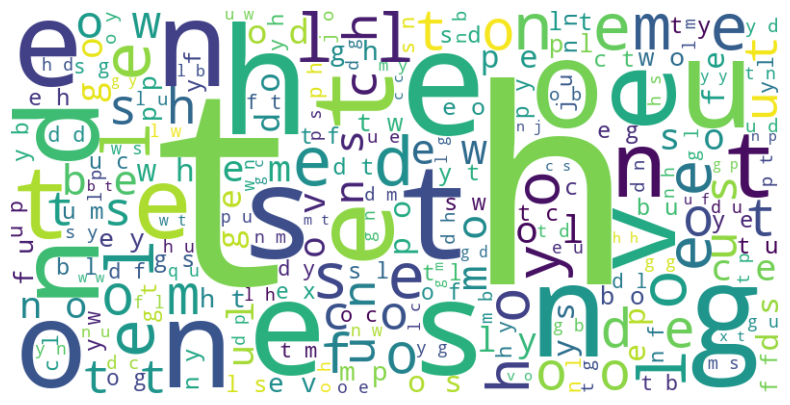

In [44]:
!pip install wordcloud




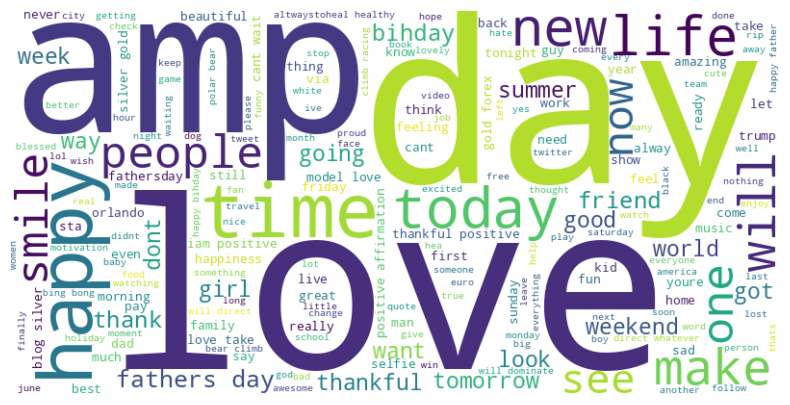

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combine all cleaned and stemmed tweets into a single string
all_text = ' '.join(data['cleaned_tweet'])

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the Word Cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


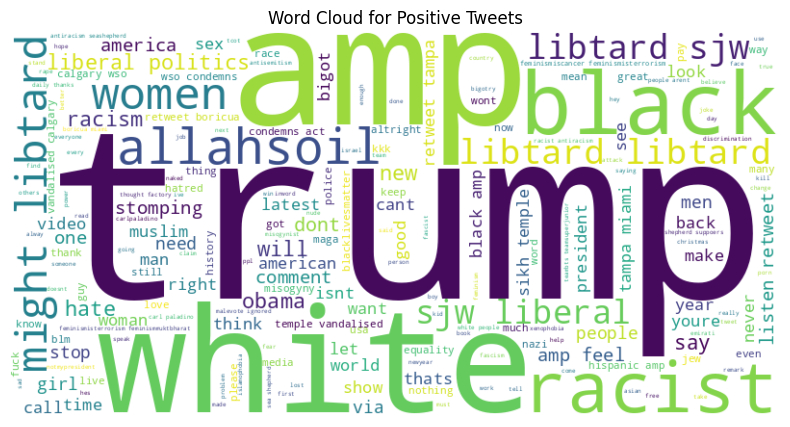

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter positive tweets
positive_tweets = data[data['label'] == 1]

# Combine all cleaned and stemmed positive tweets into a single string
positive_text = ' '.join(positive_tweets['cleaned_tweet'])

# Generate a Word Cloud for positive tweets
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the Word Cloud for positive tweets using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()


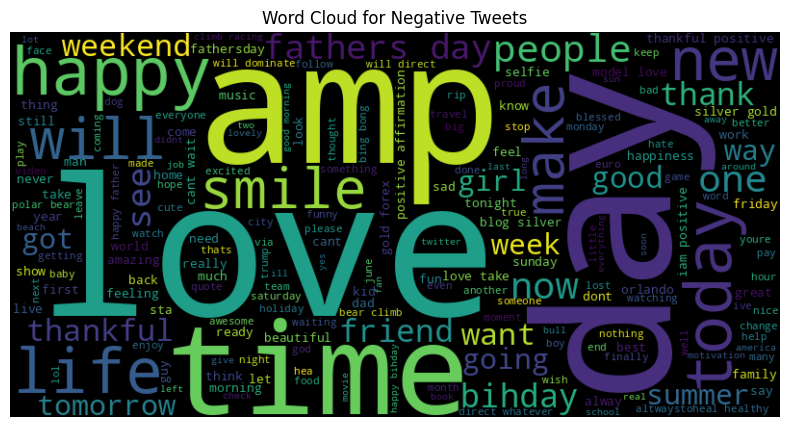

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter negative tweets
negative_tweets = data[data['label'] == 0]

# Combine all cleaned and stemmed negative tweets into a single string
negative_text = ' '.join(negative_tweets['cleaned_tweet'])

# Generate a Word Cloud for negative tweets
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Display the Word Cloud for negative tweets using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()


In [72]:
# Assuming you have a 'tweet' column in your DataFrame

# Defining a function for extracting the hashtag
def extract_hashtags(tweet):
    hashtags = re.findall(r"#(\w+)", tweet)
    return hashtags

# Extracting hashtags from non-racist/sexist tweets (positive)
positive_hashtags = data['tweet'][data['label'] == 0].apply(extract_hashtags)

# Extracting hashtags from racist/sexist tweets (negative)
negative_hashtags = data['tweet'][data['label'] == 1].apply(extract_hashtags)

# Unnest lists - combining these into a single list
ht_positive_combined = sum(positive_hashtags, [])
ht_negative_combined = sum(negative_hashtags, [])

# Display the combined lists
print("Combined Positive Hashtags:", ht_positive_combined)
print("Combined Negative Hashtags:", ht_negative_combined)


Combined Positive Hashtags: ['NotAcceptable']
Combined Negative Hashtags: ['weekend', 'PositiveVibes']


In [68]:
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Download NLTK resources (run this only once)
nltk.download('punkt')
nltk.download('stopwords')

# Sample data
data = pd.DataFrame({
    'tweet': ['Excited for the #weekend! #PositiveVibes', 'This is an offensive tweet. #NotAcceptable'],
    'label': [1, 0]
})

def preprocess_tweet(tweet):
    # Use regex to remove URLs, special characters, and numbers
    tweet = re.sub(r'http\S+|www\S+|https\S+|\d+|\W+', ' ', tweet, flags=re.MULTILINE)

    # Tokenize the tweet
    tokens = word_tokenize(tweet)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]

    # Perform stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return tokens

# Apply the preprocessing function to the 'tweet' column and create a new 'processed_tweet' column
data['processed_tweet'] = data['tweet'].apply(preprocess_tweet)

# Create a flat list of hashtags from all processed tweets
all_hashtags = [tag for tags_list in data['processed_tweet'] for tag in tags_list]

# Create a DataFrame with hashtag counts
hashtag_counts = pd.Series(all_hashtags).value_counts().reset_index()
hashtag_counts.columns = ['hashtag', 'count']

# Display the DataFrame
print("Hashtag Counts:")
print(hashtag_counts)


Hashtag Counts:
       hashtag  count
0        excit      1
1      weekend      1
2  positivevib      1
3       offens      1
4        tweet      1
5    notaccept      1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
import pandas as pd
import re

# Load your CSV dataset
data = pd.read_csv('twitter_validation2.csv')  # Replace 'your_dataset.csv' with the actual file path

# Defining a function for extracting hashtags
def extract_hashtags(tweet):
    hashtags = re.findall(r"#(\w+)", tweet)
    return hashtags

# Extracting hashtags for positive and negative tweets
data['positive_hashtags'] = data[data['label'] == 0]['tweet'].apply(extract_hashtags)
data['negative_hashtags'] = data[data['label'] == 1]['tweet'].apply(extract_hashtags)

# Flatten the lists within each cell
data['positive_hashtags'] = data['positive_hashtags'].apply(lambda x: [item.lower() for item in x] if isinstance(x, list) else [])
data['negative_hashtags'] = data['negative_hashtags'].apply(lambda x: [item.lower() for item in x] if isinstance(x, list) else [])

# Unnest lists - combining these into a single list
ht_positive_combined = sum(data['positive_hashtags'], [])
ht_negative_combined = sum(data['negative_hashtags'], [])

# Display the combined lists
print("Combined Positive Hashtags:", ht_positive_combined)
print("Combined Negative Hashtags:", ht_negative_combined)


Combined Positive Hashtags: ['run', 'lyft', 'disapointed', 'getthanked', 'model', 'motivation', 'allshowandnogo', 'school', 'exams', 'hate', 'imagine', 'actorslife', 'revolutionschool', 'girl', 'allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers', 'gr8', 'ireland', 'blog', 'silver', 'gold', 'forex', 'orlando', 'standwithorlando', 'pulseshooting', 'orlandoshooting', 'biggerproblems', 'selfish', 'heabreaking', 'values', 'love', '80days', 'gettingfed', 'got7', 'junior', 'yugyoem', 'omg', 'thankful', 'positive', 'friday', 'cookies', 'euro2016', 'badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs', 'wine', 'weekend', 'tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad', 'upsideofflorida', 'shopalyssas', 'love', 'smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback', 'ica16', 'rip', 'orlando', 'alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian', 'goodnight', 'badmonday', 'taylorswift1989', 'travelingram', 'dalat', 'ripinkylife', 'phot

In [85]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources (run this only once)
nltk.download('stopwords')
nltk.download('punkt')

# Load your CSV dataset
data = pd.read_csv('twitter_validation2.csv')  # Replace 'your_dataset.csv' with the actual file path

# Define a function to extract hashtags
def extract_hashtags(tweet):
    hashtags = re.findall(r"#(\w+)", tweet)
    return hashtags

# Extract hashtags for positive and negative tweets
data['positive_hashtags'] = data[data['label'] == 0]['tweet'].apply(extract_hashtags)
data['negative_hashtags'] = data[data['label'] == 1]['tweet'].apply(extract_hashtags)

# Flatten and lowercase the lists within each cell
data['positive_hashtags'] = data['positive_hashtags'].apply(lambda x: [word.lower() for word in x] if isinstance(x, list) else [])
data['negative_hashtags'] = data['negative_hashtags'].apply(lambda x: [word.lower() for word in x] if isinstance(x, list) else [])

# Combine hashtags into single lists
ht_positive_combined = sum(data['positive_hashtags'], [])
ht_negative_combined = sum(data['negative_hashtags'], [])

# Remove stopwords using NLTK
stop_words = set(stopwords.words('english'))
ht_positive_filtered = [word for word in ht_positive_combined if word not in stop_words]
ht_negative_filtered = [word for word in ht_negative_combined if word not in stop_words]

# Create a DataFrame with hashtag counts
freq_positive = nltk.FreqDist(ht_positive_filtered)
freq_negative = nltk.FreqDist(ht_negative_filtered)

df_positive = pd.DataFrame({'hashtag': list(freq_positive.keys()), 'count': list(freq_positive.values())})
df_negative = pd.DataFrame({'hashtag': list(freq_negative.keys()), 'count': list(freq_negative.values())})

# Display the DataFrames
print("Positive Hashtag Counts:")
print(df_positive.head())

print("\nNegative Hashtag Counts:")
print(df_negative.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Positive Hashtag Counts:
       hashtag  count
0          run     33
1         lyft      2
2  disapointed      1
3   getthanked      2
4        model    364

Negative Hashtag Counts:
        hashtag  count
0           cnn      9
1      michigan      2
2          tcot     14
3     australia      6
4  opkillingbay      2


In [92]:
# Assuming you have already created df_positive from the previous code

# Select the top 10 positive hashtags
top_positive_hashtags = df_positive.sort_values(by='count', ascending=False).head(10)

# Display the top 10 positive hashtags
print("Top 10 Positive Hashtags:")
print(top_positive_hashtags)


Top 10 Positive Hashtags:
         hashtag  count
33          love   1531
41      positive    874
162      healthy    570
209        smile    548
40      thankful    491
181          fun    434
398         life    405
220       summer    367
4          model    364
95   affirmation    363


<ipython-input-89-2dd15df94bd8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hashtag', y='count', data=top_positive_hashtags, palette='viridis')


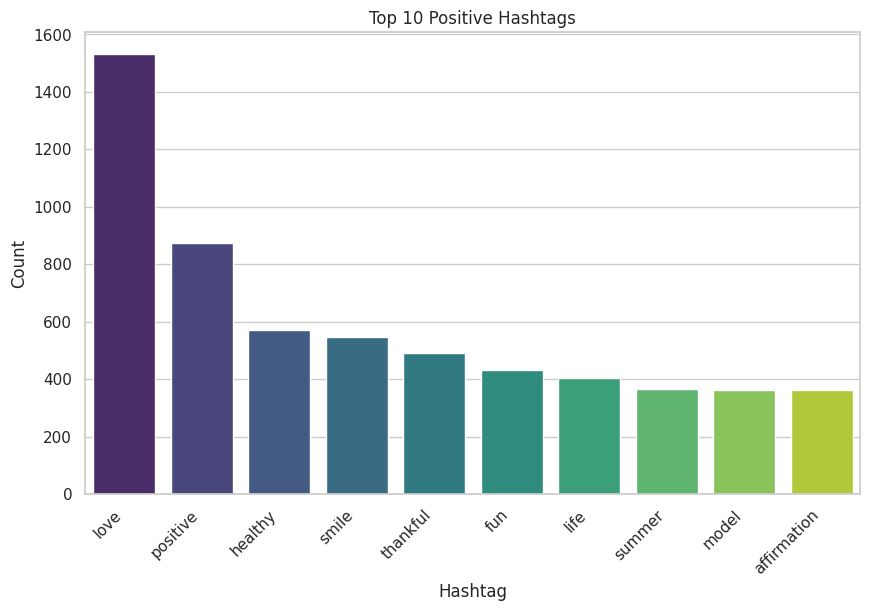

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already created top_positive_hashtags from the previous code

# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot for the top 10 positive hashtags
plt.figure(figsize=(10, 6))
sns.barplot(x='hashtag', y='count', data=top_positive_hashtags, palette='viridis')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.title('Top 10 Positive Hashtags')

# Show the plot
plt.show()


In [94]:
# Assuming you have already created df_negative from the previous code

# Select the top 10 negative hashtags
top_negative_hashtags = df_negative.sort_values(by='count', ascending=False).head(10)

# Display the top negative hashtags in a tabular format
print("Top Negative Hashtags:")
print(top_negative_hashtags[['hashtag', 'count']])


Top Negative Hashtags:
      hashtag  count
22      trump    133
31   politics     94
67  allahsoil     92
28    libtard     76
30    liberal     75
29        sjw     74
64    retweet     57
63      black     44
66     miamiâ     38
33       hate     32


<ipython-input-95-7352d04db965>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hashtag', y='count', data=top_negative_hashtags, palette='magma')


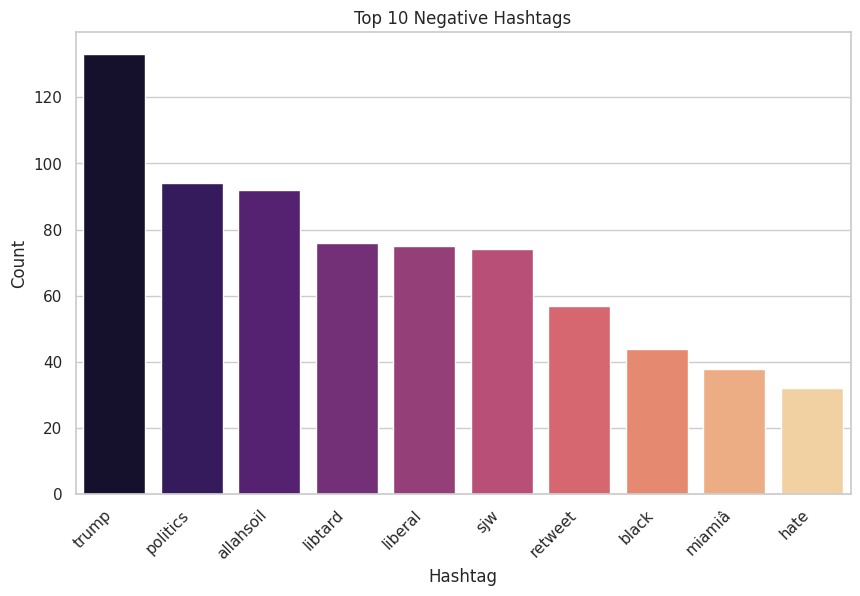

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already created df_negative from the previous code

# Select the top 10 negative hashtags
top_negative_hashtags = df_negative.sort_values(by='count', ascending=False).head(10)

# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot for the top 10 negative hashtags
plt.figure(figsize=(10, 6))
sns.barplot(x='hashtag', y='count', data=top_negative_hashtags, palette='magma')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.title('Top 10 Negative Hashtags')

# Show the plot
plt.show()
